# 1) Import Libraries

___

here to import needed libraries which will be used at our kernel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'whitegrid')

# 2) Reading Data

In [2]:
data = pd.read_excel(r'C:\Users\Admin#\Desktop\Epsilon\1..Flight_Price--_ Machine Learning\Data_Train.xlsx')
Test = pd.read_excel('C:\\Users\\Admin#\\Desktop\\Epsilon\\1..Flight_Price--_ Machine Learning\\Test_set.xlsx')

In [3]:
data.shape

(10683, 11)

In [4]:
Test.shape

(2671, 10)

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# 3 ) Hanlding Nulls

In [8]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
for n,i in enumerate(data['Route'].isna().values) : 
    if i == True : print(n)

9039


In [10]:
data.loc[9039,:]

Airline               Air India
Date_of_Journey       6/05/2019
Source                    Delhi
Destination              Cochin
Route                       NaN
Dep_Time                  09:45
Arrival_Time       09:25 07 May
Duration                23h 40m
Total_Stops                 NaN
Additional_Info         No info
Price                      7480
Name: 9039, dtype: object

In [11]:
data.drop([9039],axis=0,inplace=True)

In [12]:
for n,i in enumerate(data['Route'].isna().values) : 
    if i == True : print(n)

In [13]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [15]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# 4) Data Processing

In [16]:
def ShowDetails():
    global data
    for col in data.columns : 
        print(f'for feature {col}')
        print(f'Number of Nulls is {data[col].isna().sum()}')
        print(f'Number of Unique Values is {len(data[col].unique())}')
        print(f'Unique Values is {data[col].unique()}')
        print(f'Random Value is {data[col][np.random.randint(data.shape[0])]}')
        print(f'Random Value is {data[col][np.random.randint(data.shape[0])]}')
        print(f'Random Value is {data[col][np.random.randint(data.shape[0])]}')
        print('\n\n==================================\n\n')

In [17]:
ShowDetails()

for feature Airline
Number of Nulls is 0
Number of Unique Values is 12
Unique Values is ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Random Value is Air India
Random Value is Jet Airways
Random Value is Air India




for feature Date_of_Journey
Number of Nulls is 0
Number of Unique Values is 44
Unique Values is ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' 

In [18]:
['male','Male','female']

['male', 'Male', 'female']

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
data['New Column'] = 'Nothing'

In [21]:
data.drop(['New Column'],axis=1,inplace=True)

In [22]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [23]:
data['DayOfJourney']=  data['Date_of_Journey'].apply(lambda x : x.split('/')[0])
data['MonthOfJourney']=  data['Date_of_Journey'].apply(lambda x : x.split('/')[1])
data['YearOfJourney']=  data['Date_of_Journey'].apply(lambda x : x.split('/')[2])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [24]:
data['DayOfJourney'].unique()

array(['24', '1', '9', '12', '01', '27', '18', '3', '15', '6', '21', '06',
       '09', '03'], dtype=object)

In [25]:
data['MonthOfJourney'].unique()

array(['03', '05', '06', '04'], dtype=object)

In [26]:
data['YearOfJourney'].unique()

array(['2019'], dtype=object)

In [27]:
data.drop(['YearOfJourney'],axis=1,inplace=True)

In [28]:
data['DayOfJourney'] = data['DayOfJourney'].astype(int)
data['MonthOfJourney'] = data['MonthOfJourney'].astype(int)

In [29]:
data['DayOfJourney'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

In [30]:
data['MonthOfJourney'].unique()

array([3, 5, 6, 4])

In [31]:
set([len(i.split()) for i in data['Dep_Time'].tolist()])

{1}

In [32]:
pd.Series([len(i.split()) for i in data['Arrival_Time'].tolist()]).value_counts()

1    6348
3    4334
dtype: int64

In [33]:
set([str(i).count(":") for i in data['Arrival_Time'].tolist()])

{1}

In [34]:
len(data['Arrival_Time'].unique())

1343

In [35]:
data['AccurateArrivalTime'] = data['Arrival_Time'].apply(lambda x : x.split()[0])

In [36]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,01:10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,22:25
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,23:20
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,11:20
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,14:10


In [37]:
set([str(i).count(":") for i in data['AccurateArrivalTime'].tolist()])

{1}

In [38]:
# def GetArriveDate(n,Needed) : 
#     if len(n.split()) ==1 : 
#         return 'None'
#     else : 
#         if Needed == 'D' : 
#             return n.split()[1]
#         elif Needed == 'M' : 
#             return n.split()[2]
    

# data['AccurateArrivalDay'] = data['Arrival_Time'].apply(lambda x : GetArriveDate(x,'D'))
data['AccurateArrivalDay'] = data['Arrival_Time'].apply(lambda x : str(x).split()[1] if len(str(x).split()) ==3 else 'None')
data['AccurateArrivalMonth'] = data['Arrival_Time'].apply(lambda x : str(x).split()[2] if len(str(x).split()) ==3 else 'None')

In [39]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,01:10,22,Mar
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None


In [40]:
data['AccurateArrivalDay'].unique()

array(['22', 'None', '10', '13', '02', '04', '28', '19', '07', '16', '25',
       '20', '23', '11', '03', '08', '05', '26', '29', '17'], dtype=object)

In [41]:
data['AccurateArrivalMonth'].unique()

array(['Mar', 'None', 'Jun', 'May', 'Apr'], dtype=object)

In [42]:
def FindWrongData(DepDay,ArrivalDay) : 
    if ArrivalDay != 'None' : 
        if int(ArrivalDay) < int(DepDay) : 
            return True
        else : 
            return False
    else : 
        return False
    
data['DayDifference']  = data.apply(lambda x : FindWrongData(x.DayOfJourney,x.AccurateArrivalDay),axis = 1)

In [43]:
data[['DayOfJourney','AccurateArrivalDay','DayDifference']]

,DayOfJourney,AccurateArrivalDay,DayDifference
0,24,22,True
1,1,None,False
2,9,10,False
3,12,None,False
4,1,None,False
...,...,...,...
10677,9,None,False
10678,27,None,False
10679,27,None,False
10680,1,None,False


In [44]:
data['DayDifference'].value_counts()

False    10593
True        89
Name: DayDifference, dtype: int64

In [45]:
WrongIndices = data[data['DayDifference']==True].index
WrongIndices

Int64Index([    0,    21,   110,   379,   605,   628,  1115,  1268,  1318,
             1354,  1478,  1538,  1721,  2010,  2089,  2095,  2108,  2353,
             2364,  2537,  2568,  2588,  2618,  3170,  3247,  3301,  3639,
             3836,  3913,  4053,  4120,  4428,  4476,  4615,  4624,  4723,
             4764,  4839,  4913,  4948,  4953,  5067,  5130,  5133,  5214,
             5419,  5464,  5545,  5591,  5803,  5814,  6154,  6173,  6239,
             6436,  6494,  6677,  7146,  7337,  7507,  7527,  7584,  7612,
             7738,  8000,  8068,  8182,  8603,  8934,  9197,  9320,  9452,
             9514,  9555,  9688,  9843,  9929, 10003, 10120, 10150, 10244,
            10323, 10342, 10367, 10440, 10488, 10589, 10637, 10659],
           dtype='int64')

In [46]:
data.loc[WrongIndices,['MonthOfJourney','AccurateArrivalMonth']]

,MonthOfJourney,AccurateArrivalMonth
0,3,Mar
21,3,Mar
110,3,Mar
379,3,Mar
605,3,Mar
...,...,...
10440,3,Mar
10488,3,Mar
10589,3,Mar
10637,3,Mar


In [47]:
data.loc[WrongIndices,['MonthOfJourney','AccurateArrivalMonth']]['MonthOfJourney'].unique()

array([3, 4])

In [48]:
data.loc[WrongIndices,['MonthOfJourney','AccurateArrivalMonth']]['AccurateArrivalMonth'].unique()

array(['Mar', 'Apr'], dtype=object)

In [49]:
MonthsDict  = {3:'Mar',4:'Apr'}

In [50]:
for a,b in zip(data.loc[WrongIndices,['MonthOfJourney','AccurateArrivalMonth']]['MonthOfJourney'].tolist(),
               data.loc[WrongIndices,['MonthOfJourney','AccurateArrivalMonth']]['AccurateArrivalMonth'].tolist()) : 
    if MonthsDict[a] != b : 
        print(a)

In [51]:
data.drop(data[data['DayDifference']==True].index,axis=0,inplace=True)

In [52]:
data['DayDifference'].value_counts()

False    10593
Name: DayDifference, dtype: int64

In [53]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [54]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,22:25,None,None,False
10589,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,23:20,None,None,False
10590,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,11:20,None,None,False
10591,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,14:10,None,None,False


In [55]:
PartOfData = data[data['AccurateArrivalDay']!='None']
PartOfData

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False
5,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,10:25,13,Mar,False
6,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,05:05,02,Mar,False
7,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,10:25,13,Mar,False
12,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1 stop,In-flight meal not included,9663,9,5,09:20,10,May,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 13 Jun,24h 45m,1 stop,In-flight meal not included,10262,12,6,19:00,13,Jun,False
10577,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21h 25m,1 stop,In-flight meal not included,11087,12,3,20:20,13,Mar,False
10582,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150,27,6,19:00,28,Jun,False
10583,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704,27,5,04:25,28,May,False


In [56]:
Differences = []
for a,b in zip(PartOfData['DayOfJourney'].tolist(),PartOfData['AccurateArrivalDay'].tolist()) : 
    Differences.append(int(b) - int(a))
set(Differences)

# PartOfData['DayOfJourney'] = PartOfData['DayOfJourney'].astype(int)
# PartOfData['AccurateArrivalDay'] = PartOfData['AccurateArrivalDay'].astype(int)
# PartOfData[['DayOfJourney','AccurateArrivalDay']]


{1, 2, 4}

In [57]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False


In [58]:
def GetDiff(ArrivalDay,DepDay) : 
    if ArrivalDay != 'None' : 
        if int(ArrivalDay) - int(DepDay) == 4 : 
            return True
        else :
            return False
    else : 
        return False
    
data['Big Diff'] = data.apply(lambda x : GetDiff(x.AccurateArrivalDay,x.DayOfJourney),axis=1)

In [59]:
data['Big Diff'].value_counts()

False    10541
True        52
Name: Big Diff, dtype: int64

In [60]:
data.drop(data[data['Big Diff']==True].index,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)


In [61]:
data['Big Diff'].value_counts()

False    10541
Name: Big Diff, dtype: int64

In [62]:
pd.Series([len(i.split()) for i in data['Duration'].tolist()]).value_counts()

2    9522
1    1019
dtype: int64

In [63]:
BothHM,HAlone,MAlone,NoHM =0,0,0,0
for i in data['Duration'].tolist() : 
    if 'h' in i and 'm' in i : 
        BothHM+= 1 
    elif 'h' in i and not 'm' in i : 
        HAlone+=1
    elif not 'h' in i and  'm' in i : 
        MAlone+=1
    else : 
        NoHM  +=1
        
BothHM,HAlone,MAlone,NoHM     

(9522, 1018, 1, 0)

In [64]:
for n,i in enumerate(data['Duration'].tolist()) : 
    if not 'h' in i and  'm' in i  : 
        print(n)

6389


In [65]:
data.loc[6389,:]

Airline                             Air India
Date_of_Journey                     6/03/2019
Source                                 Mumbai
Destination                         Hyderabad
Route                   BOM → GOI → PNQ → HYD
Dep_Time                                16:50
Arrival_Time                            16:55
Duration                                   5m
Total_Stops                           2 stops
Additional_Info                       No info
Price                                   17327
DayOfJourney                                6
MonthOfJourney                              3
AccurateArrivalTime                     16:55
AccurateArrivalDay                       None
AccurateArrivalMonth                     None
DayDifference                           False
Big Diff                                False
Name: 6389, dtype: object

In [66]:
data.drop([6389],axis = 0 , inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [67]:
BothHM,HAlone,MAlone,NoHM =0,0,0,0
for i in data['Duration'].tolist() : 
    if 'h' in i and 'm' in i : 
        BothHM+= 1 
    elif 'h' in i and not 'm' in i : 
        HAlone+=1
    elif not 'h' in i and  'm' in i : 
        MAlone+=1
    else : 
        NoHM  +=1
        
BothHM,HAlone,MAlone,NoHM     

(9522, 1018, 0, 0)

In [68]:
#7h 25m	

def DurationTime(n) : 
    if 'm' in n : 
        H = n.split()[0]
        H = H.strip('h')
        
        M = n.split()[1]
        M = M.strip('m')
        return (int(H)*60) + int(M)
    else : 
        H = n.strip('h')
        return int(H)*60
        
data['DurationInMinutes']     = data['Duration'].apply(lambda x : DurationTime(x))

#df_train['Duration'] = df_train['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [69]:
data[['Duration','DurationInMinutes']]

,Duration,DurationInMinutes
0,7h 25m,445
1,19h,1140
2,5h 25m,325
3,4h 45m,285
4,2h 25m,145
...,...,...
10535,2h 30m,150
10536,2h 35m,155
10537,3h,180
10538,2h 40m,160


In [70]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False,False,445
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False,False,325
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False,False,285
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False,False,145


In [71]:
data['StopsCount'] = data['Route'].apply(lambda x : str(x).count('→') -1)

data[['Total_Stops','StopsCount']]

,Total_Stops,StopsCount
0,2 stops,2
1,2 stops,2
2,1 stop,1
3,1 stop,1
4,non-stop,0
...,...,...
10535,non-stop,0
10536,non-stop,0
10537,non-stop,0
10538,non-stop,0


In [72]:
data['Total_Stops'].value_counts()

1 stop      5527
non-stop    3470
2 stops     1498
3 stops       44
4 stops        1
Name: Total_Stops, dtype: int64

In [73]:
data['StopsCount'].value_counts()

1    5527
0    3470
2    1498
3      44
4       1
Name: StopsCount, dtype: int64

In [80]:
StopDict = {0:'non-stop',1:'1 stop',2:'2 stops',3:'3 stops',4:'4 stops'}

In [81]:
for a,b in zip(data['StopsCount'].tolist(),data['Total_Stops'].tolist()) : 
    if StopDict[a] != b : 
        print(a)

In [82]:
data[data['StopsCount']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount
9064,Air India,01/03/2019,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4 stops,Change airports,17686,1,3,11:20,02,Mar,False,False,1770,4


In [83]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [84]:
data['Additional_Info'].value_counts()

No info                         8254
In-flight meal not included     1930
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [85]:
data['MealIncluded'] = data['Additional_Info'].apply(lambda x : 1 if x != 'In-flight meal not included' else 0)
data['MealIncluded'].value_counts()

1    8610
0    1930
Name: MealIncluded, dtype: int64

In [86]:
data['Additional_Info'].replace('No Info','No info',inplace = True)

In [87]:
data['Additional_Info'].value_counts()

No info                         8257
In-flight meal not included     1930
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [88]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,13:15,None,None,False,False,445,2,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,6,04:25,10,Jun,False,False,1140,2,1
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,12,5,23:30,None,None,False,False,325,1,1
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,3,21:35,None,None,False,False,285,1,1
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,...,24,6,11:25,None,None,False,False,145,0,1


In [89]:
def DayPart(n) : 
    H = int(n.split(':')[0])
    if H < 6 : 
        return 'Early Morning'
    elif 6<=H < 12 : 
        return 'Morning'
    elif  12<=H < 15 : 
        return 'Noon'
    elif  15<=H < 19 : 
        return 'Evening'
    else : 
        return 'Night'
    
data['DepartureDayPart']   = data['Dep_Time'].apply(lambda x : DayPart(x))
data['ArrivalDayPart']   = data['AccurateArrivalTime'].apply(lambda x : DayPart(x))
data[['Dep_Time','DepartureDayPart','AccurateArrivalTime','ArrivalDayPart']]

,Dep_Time,DepartureDayPart,AccurateArrivalTime,ArrivalDayPart
0,05:50,Early Morning,13:15,Noon
1,09:25,Morning,04:25,Early Morning
2,18:05,Evening,23:30,Night
3,16:50,Evening,21:35,Night
4,09:00,Morning,11:25,Morning
...,...,...,...,...
10535,19:55,Night,22:25,Night
10536,20:45,Night,23:20,Night
10537,08:20,Morning,11:20,Morning
10538,11:30,Morning,14:10,Noon


In [90]:
data.corr()

,Price,DayOfJourney,MonthOfJourney,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded
Price,1.000000,-0.155767,-0.099739,NaN,NaN,0.517399,0.610535,-0.041719
DayOfJourney,-0.155767,1.000000,-0.035612,NaN,NaN,-0.022593,-0.008186,-0.033078
MonthOfJourney,-0.099739,-0.035612,1.000000,NaN,NaN,0.029929,0.061468,-0.087114
DayDifference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Big Diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationInMinutes,0.517399,-0.022593,0.029929,NaN,NaN,1.000000,0.739098,-0.189614
StopsCount,0.610535,-0.008186,0.061468,NaN,NaN,0.739098,1.000000,-0.106112
MealIncluded,-0.041719,-0.033078,-0.087114,NaN,NaN,-0.189614,-0.106112,1.000000


In [91]:
data['DurationInMinutes'].min(),data['DurationInMinutes'].max()

(75, 2860)

In [94]:
def FlightLength(H) : 
    if H < 180 : 
        return 'Short'
    elif 180<=H < 600 : 
        return 'Medium'
    else : 
        return 'Long'
    
data['FlightLength']   = data['DurationInMinutes'].apply(lambda x : FlightLength(x))
data[['DurationInMinutes','FlightLength']]

,DurationInMinutes,FlightLength
0,445,Medium
1,1140,Long
2,325,Medium
3,285,Medium
4,145,Short
...,...,...
10535,150,Short
10536,155,Short
10537,180,Medium
10538,160,Short


In [95]:
data['FlightLength'].value_counts()

Long      4651
Short     3002
Medium    2887
Name: FlightLength, dtype: int64

In [96]:
data['Price'].min(),data['Price'].max()

(1759, 79512)

In [97]:
def PriceRange(H) : 
    if H < 5000 : 
        return 'Cheap'
    elif 5000<=H < 10000 : 
        return 'Medium'
    else : 
        return 'Expensive'
    
data['PriceRange']   = data['Price'].apply(lambda x : PriceRange(x))
data[['Price','PriceRange']]

,Price,PriceRange
0,7662,Medium
1,13882,Expensive
2,6218,Medium
3,13302,Expensive
4,3873,Cheap
...,...,...
10535,4107,Cheap
10536,4145,Cheap
10537,7229,Medium
10538,12648,Expensive


In [98]:
data['PriceRange'].value_counts()

Expensive    4293
Medium       3871
Cheap        2376
Name: PriceRange, dtype: int64

In [100]:
data['Source'].unique()

array(['Kolkata', 'Delhi', 'Banglore', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
# s=['Delhi','Kolkata','Banglore','Mumbai','Chennai']
# for x in s:
#     geolocator = Nominatim(user_agent="Singularity")
#     location=geolocator.geocode(x)
#     print(f'country:{x}')
#     print((location.latitude,location.longitude))
#     print('-'*20)


# df['Source'].replace('Delhi','28.6517178,77.2219388',inplace=True)
# df['Source'].replace('Kolkata','22.5414185,88.35769124388872',inplace=True)
# df['Source'].replace('Banglore','12.9587464,77.5573456',inplace=True)
# df['Source'].replace('Mumbai','19.0759899,72.8773928',inplace=True)
# df['Source'].replace('Chennai','13.0836939,80.270186',inplace=True)


# d=['Cochin','Banglore','Delhi','New Delhi','Hyderabad','Kolkata' ]
# for i in d:
#     geolocator = Nominatim(user_agent="Singularity")
#     location=geolocator.geocode(i)
#     print(f'country:{i}')
#     print((location.latitude,location.longitude))
#     print('-'*20)

# df['Destination'].replace('Cochin','9.931308,76.2674136',inplace=True)
# df['Destination'].replace('Banglore','12.9587464,77.5573456',inplace=True)
# df['Destination'].replace('Delhi','28.6517178,77.2219388',inplace=True)
# df['Destination'].replace('New Delhi','28.6138954,77.2090057',inplace=True)
# df['Destination'].replace('Hyderabad','17.360589,78.4740613',inplace=True)
# df['Destination'].replace('Kolkata','22.5414185,88.35769124388872',inplace=True)
# df



# df['source_lat']=df['Source'].apply(lambda x: x.split(',')[0])
# df['source_lon']=df['Source'].apply(lambda x: x.split(',')[1])
# df['destination_lat']=df['Destination'].apply(lambda x: x.split(',')[0])
# df['destination_lon']=df['Destination'].apply(lambda x: x.split(',')[1])
# df.drop(['Source','Destination'],axis=1,inplace=True)


# df['distance']=haversine_distance(df['source_lat'],df['source_lon'],df['destination_lat'],df['destination_lon'])


# 5) Data Visualization

In [120]:
def CPlot(feature) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    sns.countplot(x = feature,data=data,facecolor = (0,0,0,0),linewidth = 5,
                  edgecolor= sns.color_palette('dark',3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    return None

def KPlot(feature) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    sns.kdeplot(data[feature],shade=True)
    return None

def Pie(feature,limit=20) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(data[feature].value_counts()[:limit],labels = list(data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None
   
    

In [121]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded,DepartureDayPart,ArrivalDayPart,FlightLength,PriceRange
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,None,False,False,445,2,1,Early Morning,Noon,Medium,Medium
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,Jun,False,False,1140,2,1,Morning,Early Morning,Long,Expensive
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,None,False,False,325,1,1,Evening,Night,Medium,Medium
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,None,False,False,285,1,1,Evening,Night,Medium,Expensive
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,...,None,False,False,145,0,1,Morning,Morning,Short,Cheap


In [122]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'DayOfJourney', 'MonthOfJourney',
       'AccurateArrivalTime', 'AccurateArrivalDay', 'AccurateArrivalMonth',
       'DayDifference', 'Big Diff', 'DurationInMinutes', 'StopsCount',
       'MealIncluded', 'DepartureDayPart', 'ArrivalDayPart', 'FlightLength',
       'PriceRange'],
      dtype='object')

In [123]:
len(data['Airline'].unique())

12

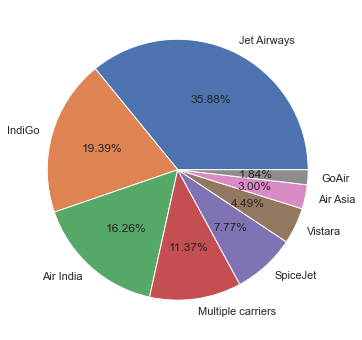

In [124]:
Pie('Airline',8)

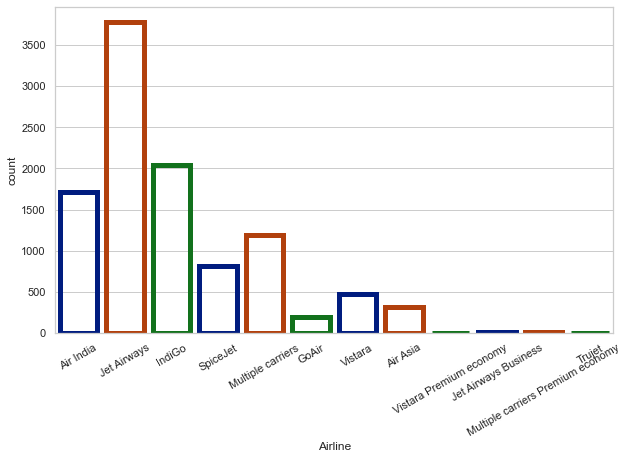

In [125]:
CPlot('Airline')

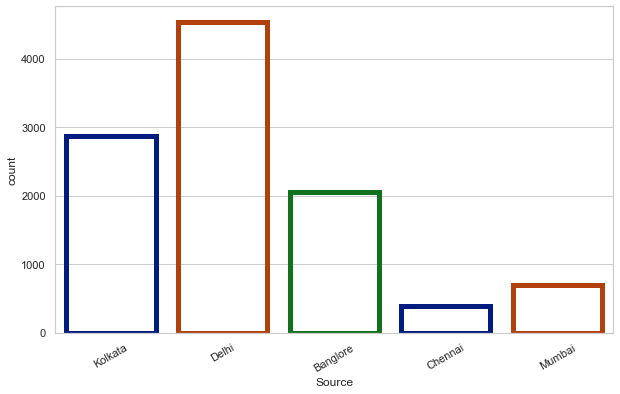

In [126]:
CPlot('Source')

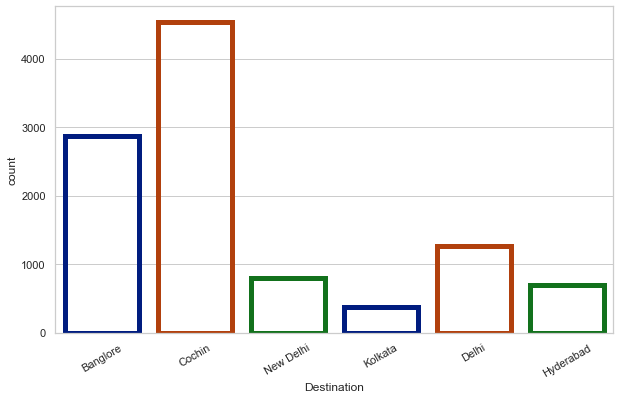

In [127]:
CPlot('Destination')

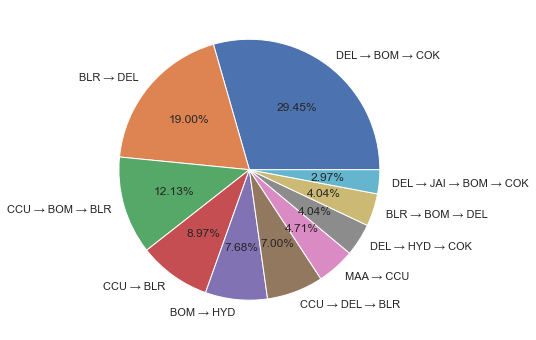

In [129]:
Pie('Route',10)

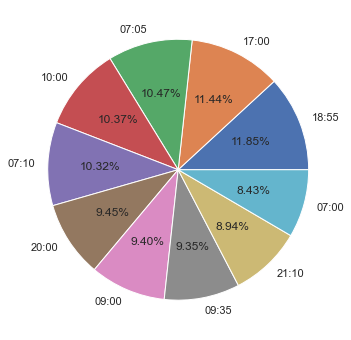

In [130]:
Pie('Dep_Time',10)

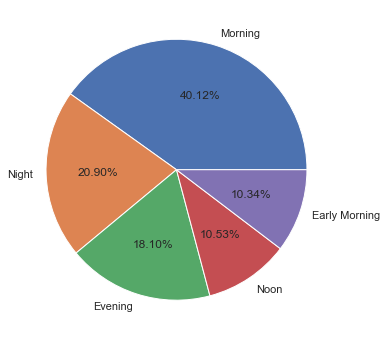

In [131]:
Pie('DepartureDayPart')

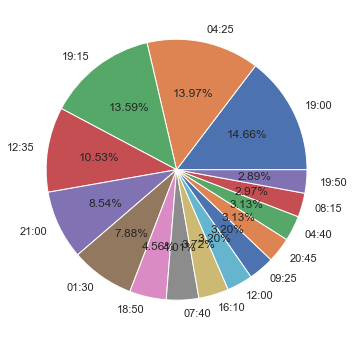

In [133]:
Pie('AccurateArrivalTime',15)

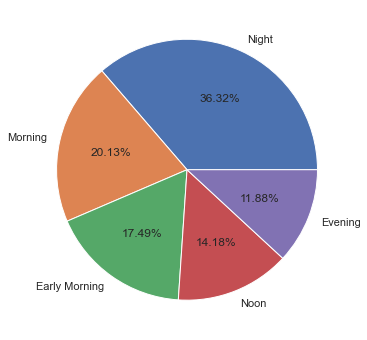

In [134]:
Pie('ArrivalDayPart')

In [139]:
# CPlot('DurationInMinutes')

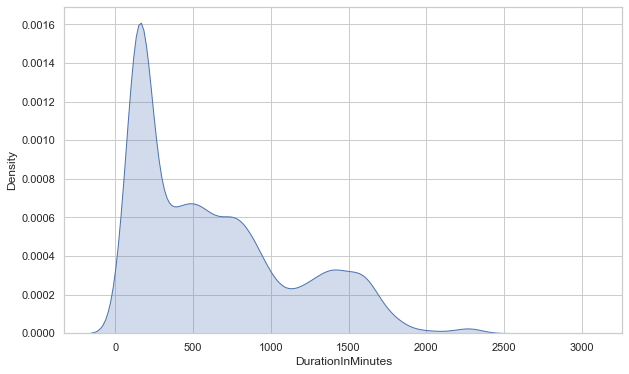

In [140]:
KPlot('DurationInMinutes')

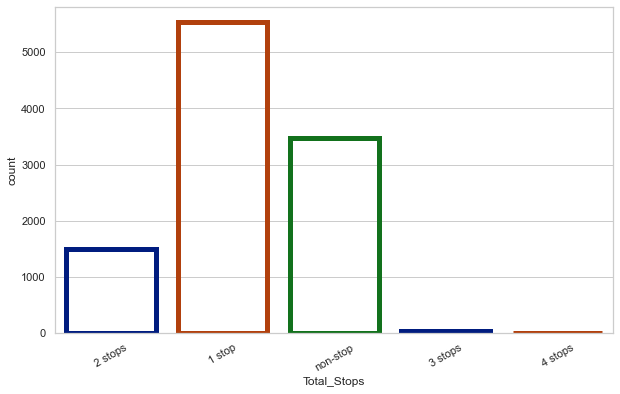

In [141]:
CPlot('Total_Stops')

In [142]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'DayOfJourney', 'MonthOfJourney',
       'AccurateArrivalTime', 'AccurateArrivalDay', 'AccurateArrivalMonth',
       'DayDifference', 'Big Diff', 'DurationInMinutes', 'StopsCount',
       'MealIncluded', 'DepartureDayPart', 'ArrivalDayPart', 'FlightLength',
       'PriceRange'],
      dtype='object')

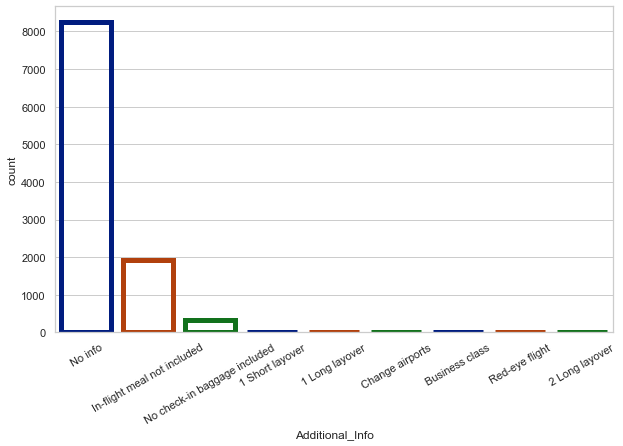

In [144]:
CPlot('Additional_Info')

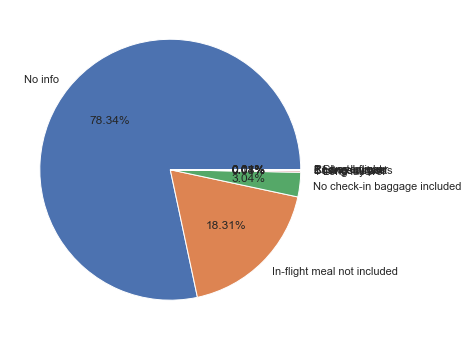

In [145]:
Pie('Additional_Info')

In [146]:
Data = data[data['Additional_Info']!='No info']
Data.shape

(2283, 25)

([<matplotlib.patches.Wedge at 0x1783794ea30>,
 [Text(-0.9727541650697858, 0.5135653165269087, 'In-flight meal not included'),
  Text(0.9484380125978066, -0.5571941638778382, 'No check-in baggage included'),
  Text(1.0977001686176222, -0.07109388030515887, '1 Long layover'),
  Text(1.099540737169727, -0.031783129239478985, 'Change airports'),
  Text(1.099895852559876, -0.01513649634437996, 'Business class'),
  Text(1.0999739625425609, -0.00756846935763511, 'Red-eye flight'),
  Text(1.0999906263528105, -0.00454113817802701, '2 Long layover'),
  Text(1.099998958405193, -0.0015137726020688328, '1 Short layover')],
 [Text(-0.5305931809471558, 0.28012653628740475, '84.54%'),
  Text(0.517329825053349, -0.30392408938791166, '14.02%'),
  Text(0.5987455465187029, -0.03877848016645029, '0.83%'),
  Text(0.5997494930016692, -0.01733625231244308, '0.31%'),
  Text(0.5999431923053868, -0.008256270733298158, '0.18%'),
  Text(0.5999857977504877, -0.004128256013255514, '0.04%'),
  Text(0.599994887101532

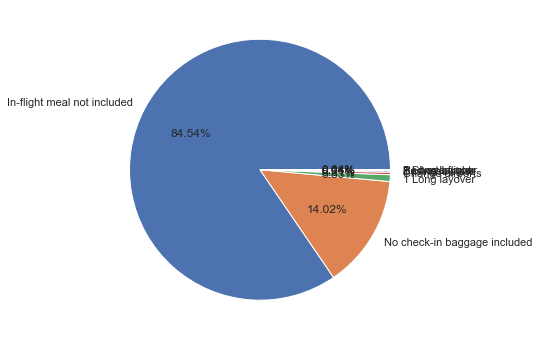

In [148]:
feature = 'Additional_Info'
limit = 10
fig,ax = plt.subplots(figsize = (10,6))
plt.pie(Data[feature].value_counts()[:limit],labels = list(Data[feature].value_counts()[:limit].index),
        autopct = '%1.2f%%',labeldistance= 1.1)


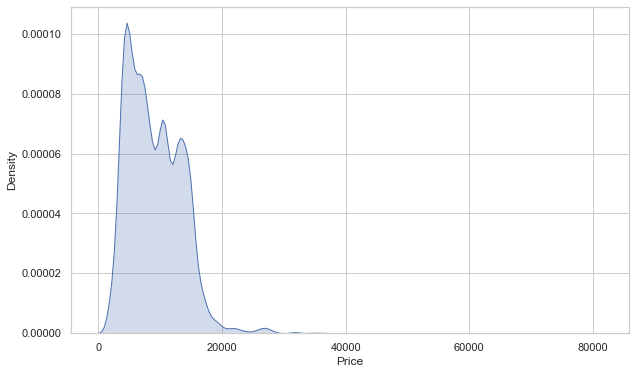

In [149]:
KPlot('Price')

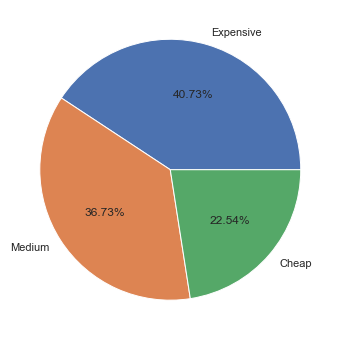

In [150]:
Pie('PriceRange')

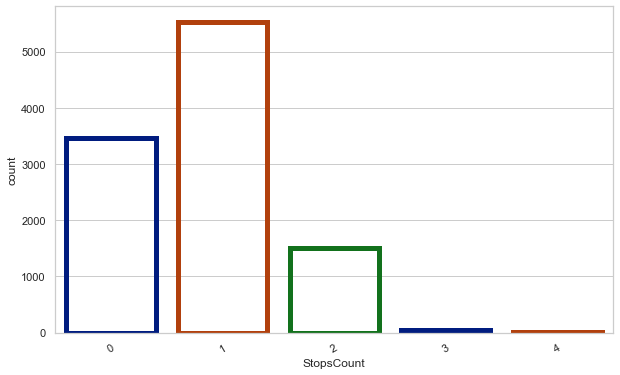

In [151]:
CPlot('StopsCount')

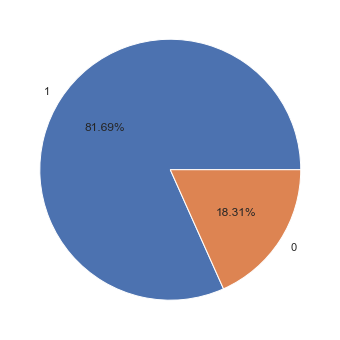

In [152]:
Pie('MealIncluded')

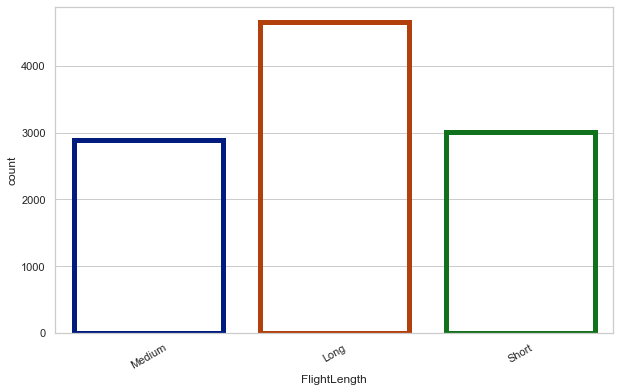

In [153]:
CPlot('FlightLength')

In [154]:
data['PriceRange'].unique()

array(['Medium', 'Expensive', 'Cheap'], dtype=object)

In [155]:
def SelectedFeaturePie(feature,limit=10) : 
    global data
    fig,ax = plt.subplots(figsize = (15,5))
    
    plt.subplot(1,3,1)
    plt.title('Cheap Tickets')
    Data = data[data['PriceRange']=='Cheap']
    plt.pie(Data[feature].value_counts()[:limit],labels = list(Data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)

    plt.subplot(1,3,2)
    plt.title('Medium Tickets')
    Data = data[data['PriceRange']=='Medium']
    plt.pie(Data[feature].value_counts()[:limit],labels = list(Data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)

    plt.subplot(1,3,3)
    plt.title('Expensive Tickets')
    Data = data[data['PriceRange']=='Expensive']
    plt.pie(Data[feature].value_counts()[:limit],labels = list(Data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    
    return None  

In [156]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'DayOfJourney', 'MonthOfJourney',
       'AccurateArrivalTime', 'AccurateArrivalDay', 'AccurateArrivalMonth',
       'DayDifference', 'Big Diff', 'DurationInMinutes', 'StopsCount',
       'MealIncluded', 'DepartureDayPart', 'ArrivalDayPart', 'FlightLength',
       'PriceRange'],
      dtype='object')

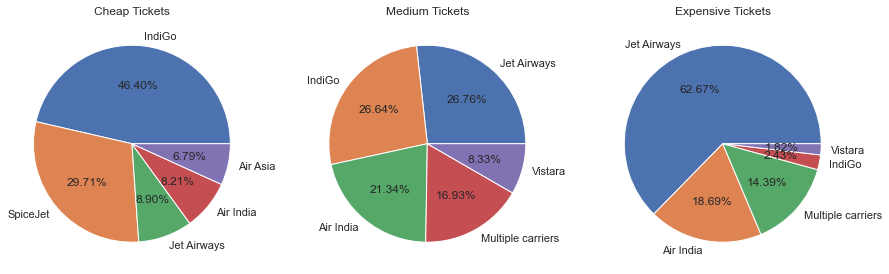

In [158]:
SelectedFeaturePie('Airline',5)

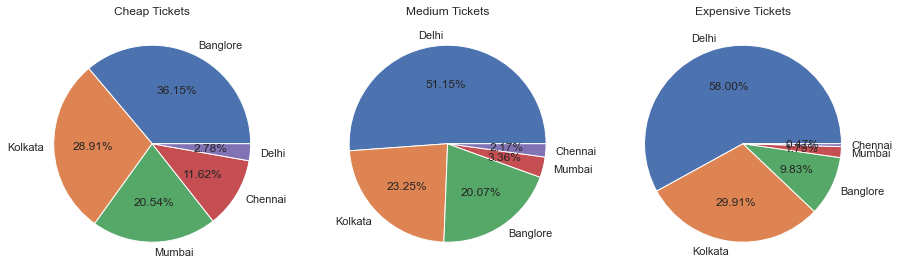

In [159]:
SelectedFeaturePie('Source',5)

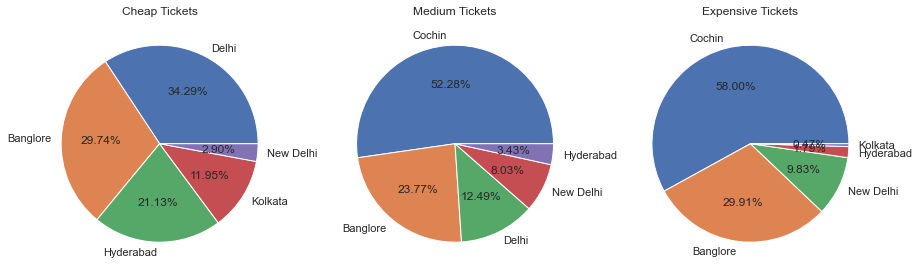

In [160]:
SelectedFeaturePie('Destination',5)

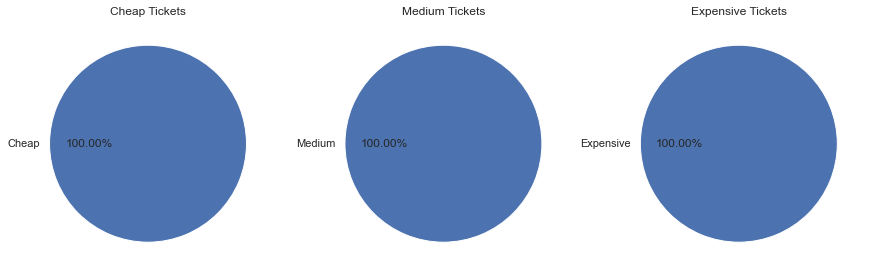

In [161]:
SelectedFeaturePie('PriceRange',5)

# 6) Data Preparing

In [163]:
pd.set_option('display.max_columns',None)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded,DepartureDayPart,ArrivalDayPart,FlightLength,PriceRange
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False,False,445,2,1,Early Morning,Noon,Medium,Medium
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140,2,1,Morning,Early Morning,Long,Expensive
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False,False,325,1,1,Evening,Night,Medium,Medium
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False,False,285,1,1,Evening,Night,Medium,Expensive
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False,False,145,0,1,Morning,Morning,Short,Cheap


In [164]:
data['DepartureHour'] = data['Dep_Time'].apply(lambda x : x.split(':')[0])
data['ArrivalHour'] = data['AccurateArrivalTime'].apply(lambda x : x.split(':')[0])

In [165]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded,DepartureDayPart,ArrivalDayPart,FlightLength,PriceRange,DepartureHour,ArrivalHour
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False,False,445,2,1,Early Morning,Noon,Medium,Medium,05,13
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140,2,1,Morning,Early Morning,Long,Expensive,09,04
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False,False,325,1,1,Evening,Night,Medium,Medium,18,23
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False,False,285,1,1,Evening,Night,Medium,Expensive,16,21
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False,False,145,0,1,Morning,Morning,Short,Cheap,09,11


In [166]:
from sklearn.preprocessing import LabelEncoder

In [167]:
AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()

In [168]:
def ApplyEncoder(Encoder,OriginalColumn) : 
    global data
    Encoder.fit(data[OriginalColumn])
    return Encoder.transform(data[OriginalColumn])

In [172]:
data['AirLineEnc'] = ApplyEncoder(AirLineEnc,'Airline')
data['SourceEnc'] = ApplyEncoder(SourceEnc,'Source')
data['DestinationEnc'] = ApplyEncoder(DestinationEnc,'Destination')
data['AdditionalInfoEnc'] = ApplyEncoder(AdditionalInfoEnc,'Additional_Info')
data['MealIncludedEnc'] = ApplyEncoder(MealIncludedEnc,'MealIncluded')
data['DepDayEnc'] = ApplyEncoder(DepDayEnc,'DepartureDayPart')
data['ArrivDayEnc'] = ApplyEncoder(ArrivDayEnc,'ArrivalDayPart')
data['FlightLengthEnc'] = ApplyEncoder(FlightLengthEnc,'FlightLength')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded,DepartureDayPart,ArrivalDayPart,FlightLength,PriceRange,DepartureHour,ArrivalHour,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False,False,445,2,1,Early Morning,Noon,Medium,Medium,05,13,1,3,0,7,1,0,4,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140,2,1,Morning,Early Morning,Long,Expensive,09,04,4,2,1,7,1,2,0,0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False,False,325,1,1,Evening,Night,Medium,Medium,18,23,3,3,0,7,1,1,3,1
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False,False,285,1,1,Evening,Night,Medium,Expensive,16,21,3,0,5,7,1,1,3,1
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False,False,145,0,1,Morning,Morning,Short,Cheap,09,11,8,3,0,7,1,2,2,2


In [171]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'DayOfJourney', 'MonthOfJourney',
       'AccurateArrivalTime', 'AccurateArrivalDay', 'AccurateArrivalMonth',
       'DayDifference', 'Big Diff', 'DurationInMinutes', 'StopsCount',
       'MealIncluded', 'DepartureDayPart', 'ArrivalDayPart', 'FlightLength',
       'PriceRange', 'DepartureHour', 'ArrivalHour', 'AirLineEnc'],
      dtype='object')

In [173]:
ColumnsToInt = ['DayOfJourney','MonthOfJourney','DurationInMinutes','StopsCount','DepartureHour','ArrivalHour']

for col in ColumnsToInt : 
    data[col] = data[col].astype(int)
data.head()    

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded,DepartureDayPart,ArrivalDayPart,FlightLength,PriceRange,DepartureHour,ArrivalHour,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False,False,445,2,1,Early Morning,Noon,Medium,Medium,5,13,1,3,0,7,1,0,4,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140,2,1,Morning,Early Morning,Long,Expensive,9,4,4,2,1,7,1,2,0,0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False,False,325,1,1,Evening,Night,Medium,Medium,18,23,3,3,0,7,1,1,3,1
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False,False,285,1,1,Evening,Night,Medium,Expensive,16,21,3,0,5,7,1,1,3,1
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False,False,145,0,1,Morning,Morning,Short,Cheap,9,11,8,3,0,7,1,2,2,2


In [174]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'DayOfJourney', 'MonthOfJourney',
       'AccurateArrivalTime', 'AccurateArrivalDay', 'AccurateArrivalMonth',
       'DayDifference', 'Big Diff', 'DurationInMinutes', 'StopsCount',
       'MealIncluded', 'DepartureDayPart', 'ArrivalDayPart', 'FlightLength',
       'PriceRange', 'DepartureHour', 'ArrivalHour', 'AirLineEnc', 'SourceEnc',
       'DestinationEnc', 'AdditionalInfoEnc', 'MealIncludedEnc', 'DepDayEnc',
       'ArrivDayEnc', 'FlightLengthEnc'],
      dtype='object')

In [182]:
X = data[['DayOfJourney', 'MonthOfJourney','DurationInMinutes', 'StopsCount',
        'DepartureHour', 'ArrivalHour', 'AirLineEnc', 'SourceEnc',
       'DestinationEnc', 'AdditionalInfoEnc', 'MealIncludedEnc', 'DepDayEnc',
       'ArrivDayEnc', 'FlightLengthEnc']]

y = data['Price']

In [183]:
X

,DayOfJourney,MonthOfJourney,DurationInMinutes,StopsCount,DepartureHour,ArrivalHour,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,1,5,445,2,5,13,1,3,0,7,1,0,4,1
1,9,6,1140,2,9,4,4,2,1,7,1,2,0,0
2,12,5,325,1,18,23,3,3,0,7,1,1,3,1
3,1,3,285,1,16,21,3,0,5,7,1,1,3,1
4,24,6,145,0,9,11,8,3,0,7,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,9,4,150,0,19,22,0,3,0,7,1,3,3,2
10536,27,4,155,0,20,23,1,3,0,7,1,3,3,2
10537,27,4,180,0,8,11,4,0,2,7,1,2,2,1
10538,1,3,160,0,11,14,10,0,5,7,1,2,4,2


In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True , random_state = 44)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7905, 14), (2635, 14), (7905,), (2635,))

In [186]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 

LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
LassoRegressionModel = Lasso(alpha=1.0,random_state=33,normalize=False)
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') 
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')    


Models = [LinearRegressionModel,SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
          GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel]


In [187]:
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')


for Model LinearRegression
Train Score is : 0.4775435721590313
Test Score is : 0.4910747444977117
MAE value is  : 2348.0094105104376
MSE value is  : 9482944.967448851
MdSE value is  : 1933.4450625718346
for Model SGDRegressor
Train Score is : -0.34121647825491275
Test Score is : -0.3704092607956637
MAE value is  : 3964.3075928041058
MSE value is  : 25535214.577200536
MdSE value is  : 2974.772098653234
for Model Lasso
Train Score is : 0.4775398346163826
Test Score is : 0.4911929599644921
MAE value is  : 2347.5065289052122
MSE value is  : 9480742.225978155
MdSE value is  : 1933.159739515413
for Model Ridge
Train Score is : 0.4775432967987898
Test Score is : 0.49110777230231595
MAE value is  : 2347.8961001300145
MSE value is  : 9482329.55123582
MdSE value is  : 1935.075937933023
for Model RandomForestRegressor
Train Score is : 0.8854897897961012
Test Score is : 0.831247989774579
MAE value is  : 1114.5458613588278
MSE value is  : 3144402.854471501
MdSE value is  : 721.1112509484228
for Mod

In [188]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

SelectedModel = RandomForestRegressor(random_state=33)
SelectedParameters = {'n_estimators':[100,200,500,1000],'max_depth':[2,4,8,10]}



GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,
                               cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[
    ['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

All Results are :
     mean_test_score  std_test_score                                   params  \
0          0.458371        0.022505    {'max_depth': 2, 'n_estimators': 100}   
1          0.457557        0.020504    {'max_depth': 2, 'n_estimators': 200}   
2          0.454872        0.017608    {'max_depth': 2, 'n_estimators': 500}   
3          0.455927        0.018540   {'max_depth': 2, 'n_estimators': 1000}   
4          0.626189        0.003478    {'max_depth': 4, 'n_estimators': 100}   
5          0.625980        0.004057    {'max_depth': 4, 'n_estimators': 200}   
6          0.626556        0.004646    {'max_depth': 4, 'n_estimators': 500}   
7          0.627794        0.003929   {'max_depth': 4, 'n_estimators': 1000}   
8          0.798254        0.003801    {'max_depth': 8, 'n_estimators': 100}   
9          0.799998        0.004054    {'max_depth': 8, 'n_estimators': 200}   
10         0.799500        0.004813    {'max_depth': 8, 'n_estimators': 500}   
11         0.799962  

In [190]:
GridSearchModel.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=33)

In [189]:
def DurationTime(n) : 
    if 'm' in n and 'h' in n : 
        H = n.split()[0]
        H = H.strip('h')
        
        M = n.split()[1]
        M = M.strip('m')
        return  int(M) + (60*int(H))
    elif 'm' in n and not 'h' in n : 
        M = n.strip('m')
        return  int(M) 
    else : 
        n = n.strip('h')
        return int(n)*60

    
Test['DayOfJourney'] = Test['Date_of_Journey'].apply(lambda x : x.split('/')[0])
Test['MonthOfJourney'] = Test['Date_of_Journey'].apply(lambda x : x.split('/')[1])
Test['ArrivalTime'] = Test['Arrival_Time'].apply(lambda x : x.split()[0])
Test['DurationTime'] = Test['Duration'].apply(lambda x  :DurationTime(x))
Test['StopsCount'] = Test['Route'].apply(lambda x : x.count('→')-1)
Test['Meal Included'] = Test['Additional_Info'].apply(lambda x : 1 if 
                                                      x !='In-flight meal not included' else 0 )
Test['Additional_Info'].replace('No Info','No info',inplace=True)
Test['DepartureDayPart'] =Test['Dep_Time'].apply(lambda x : DayPart(x))
Test['ArrivalDayPart'] = Test['ArrivalTime'].apply(lambda x : DayPart(x))
Test['FlightLength'] = Test['DurationTime'].apply(lambda x : FlightLength(x))
Test['DepartureHour'] = Test['Dep_Time'].apply(lambda x : x.split(':')[0])
Test['ArrivalHour'] = Test['ArrivalTime'].apply(lambda x : x.split(':')[0])

Test.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,ArrivalTime,DurationTime,StopsCount,Meal Included,DepartureDayPart,ArrivalDayPart,FlightLength,DepartureHour,ArrivalHour
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,04:25,655,1,1,Evening,Early Morning,Long,17,04
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,10:20,240,1,1,Morning,Morning,Medium,06,10
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,19:00,1425,1,0,Night,Night,Long,19,19
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,21:00,780,1,1,Morning,Night,Long,08,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,02:45,170,0,1,Night,Early Morning,Short,23,02


In [192]:
def ApplyTestEncoder(Encoder,OriginalColumn) : 
    global Test
    return Encoder.transform(Test[OriginalColumn])


# AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()



Test['AirlineEnc'] = ApplyTestEncoder(AirLineEnc,'Airline')
Test['SourceEnc'] = ApplyTestEncoder(SourceEnc,'Source')
Test['DestinationEnc'] = ApplyTestEncoder(DestinationEnc,'Destination')
Test['AdditionalInfoEnc'] = ApplyTestEncoder(AdditionalInfoEnc,'Additional_Info')
Test['MealIncludedEnc'] = ApplyTestEncoder(MealIncludedEnc,'Meal Included')
Test['DepartureDayPartEnc'] = ApplyTestEncoder(DepDayEnc,'DepartureDayPart')
Test['ArrivalDayPartEnc'] = ApplyTestEncoder(ArrivDayEnc,'ArrivalDayPart')
Test['FlightLengthEnc'] = ApplyTestEncoder(FlightLengthEnc,'FlightLength')
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,ArrivalTime,DurationTime,StopsCount,Meal Included,DepartureDayPart,ArrivalDayPart,FlightLength,DepartureHour,ArrivalHour,AirlineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepartureDayPartEnc,ArrivalDayPartEnc,FlightLengthEnc
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,04:25,655,1,1,Evening,Early Morning,Long,17,04,4,2,1,7,1,1,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,10:20,240,1,1,Morning,Morning,Medium,06,10,3,3,0,7,1,2,2,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,19:00,1425,1,0,Night,Night,Long,19,19,4,2,1,5,0,3,3,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,21:00,780,1,1,Morning,Night,Long,08,21,6,2,1,7,1,2,3,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,02:45,170,0,1,Night,Early Morning,Short,23,02,0,0,2,7,1,3,0,2


In [193]:
Test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'DayOfJourney', 'MonthOfJourney', 'ArrivalTime',
       'DurationTime', 'StopsCount', 'Meal Included', 'DepartureDayPart',
       'ArrivalDayPart', 'FlightLength', 'DepartureHour', 'ArrivalHour',
       'AirlineEnc', 'SourceEnc', 'DestinationEnc', 'AdditionalInfoEnc',
       'MealIncludedEnc', 'DepartureDayPartEnc', 'ArrivalDayPartEnc',
       'FlightLengthEnc'],
      dtype='object')

In [194]:
ColumnsToInt = ['DayOfJourney','MonthOfJourney','DurationTime','StopsCount',
                'Meal Included','DepartureHour','ArrivalHour'] 
for col in ColumnsToInt : 
    Test[col]  =Test[col].astype(int)
Test.head()    


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,ArrivalTime,DurationTime,StopsCount,Meal Included,DepartureDayPart,ArrivalDayPart,FlightLength,DepartureHour,ArrivalHour,AirlineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepartureDayPartEnc,ArrivalDayPartEnc,FlightLengthEnc
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,04:25,655,1,1,Evening,Early Morning,Long,17,4,4,2,1,7,1,1,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,10:20,240,1,1,Morning,Morning,Medium,6,10,3,3,0,7,1,2,2,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19:00,1425,1,0,Night,Night,Long,19,19,4,2,1,5,0,3,3,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,21:00,780,1,1,Morning,Night,Long,8,21,6,2,1,7,1,2,3,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,02:45,170,0,1,Night,Early Morning,Short,23,2,0,0,2,7,1,3,0,2


In [199]:
Test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'DayOfJourney', 'MonthOfJourney', 'ArrivalTime',
       'DurationTime', 'StopsCount', 'Meal Included', 'DepartureDayPart',
       'ArrivalDayPart', 'FlightLength', 'DepartureHour', 'ArrivalHour',
       'AirlineEnc', 'SourceEnc', 'DestinationEnc', 'AdditionalInfoEnc',
       'MealIncludedEnc', 'DepartureDayPartEnc', 'ArrivalDayPartEnc',
       'FlightLengthEnc'],
      dtype='object')

In [200]:


X = Test[['DayOfJourney','MonthOfJourney','DurationTime','StopsCount',
          'Meal Included','DepartureHour','ArrivalHour', 'AirlineEnc', 'SourceEnc','DestinationEnc', 
          'AdditionalInfoEnc', 'DepartureDayPartEnc', 'ArrivalDayPartEnc', 'FlightLengthEnc']]

In [202]:
Results = GridSearchModel.best_estimator_.predict(X)

In [203]:
Results = [np.round(i) for i in Results]
Results

[16463.0,
 28965.0,
 15621.0,
 16757.0,
 27144.0,
 15222.0,
 11331.0,
 32865.0,
 28022.0,
 22971.0,
 16540.0,
 16445.0,
 16499.0,
 8435.0,
 15532.0,
 13560.0,
 15997.0,
 17673.0,
 16897.0,
 11813.0,
 14196.0,
 16671.0,
 11222.0,
 21053.0,
 28163.0,
 15968.0,
 27800.0,
 15237.0,
 16933.0,
 19128.0,
 28491.0,
 10781.0,
 23967.0,
 29004.0,
 26095.0,
 26767.0,
 26048.0,
 12799.0,
 15970.0,
 16502.0,
 27549.0,
 9992.0,
 26405.0,
 17493.0,
 28316.0,
 28556.0,
 19214.0,
 26427.0,
 20527.0,
 16767.0,
 19757.0,
 37173.0,
 16879.0,
 10027.0,
 27160.0,
 28129.0,
 25402.0,
 11616.0,
 26981.0,
 16520.0,
 16753.0,
 20550.0,
 25419.0,
 21303.0,
 5410.0,
 27380.0,
 25814.0,
 16024.0,
 28432.0,
 22635.0,
 26279.0,
 15834.0,
 26596.0,
 16403.0,
 26426.0,
 28568.0,
 27385.0,
 42787.0,
 28614.0,
 16566.0,
 27610.0,
 15782.0,
 21782.0,
 27808.0,
 9836.0,
 10044.0,
 27012.0,
 16518.0,
 27828.0,
 15956.0,
 16447.0,
 16956.0,
 27107.0,
 15138.0,
 26668.0,
 26192.0,
 16659.0,
 19128.0,
 25965.0,
 20678.0,
 289

In [205]:
Test = pd.read_excel('Test_set.xlsx')
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [206]:
Test['Predicted Price'] = Results
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Predicted Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,16463.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,28965.0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,15621.0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,16757.0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,27144.0


In [207]:
Test.to_csv('new file.csv')

In [212]:
data = pd.read_excel(r'C:\Users\Admin#\Desktop\Epsilon\1..Flight_Price--_ Machine Learning\Data_Train.xlsx')

In [209]:
data.shape

(10683, 11)

In [210]:
data.drop_duplicates(inplace=True)

In [211]:
data.shape

(10463, 11)

In [214]:
Data = data[data.duplicated()]
Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [217]:
Data[Data['Airline']=='Jet Airways'].to_csv('d.csv')